In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import glob
from zipfile import ZipFile

In [3]:
file = 'crime.zip'
zip_files = glob.glob(file)
data = pd.DataFrame()
for path in zip_files:
    with ZipFile(path, 'r') as zip_file:
        for file_name in zip_file.namelist():
            with zip_file.open(file_name) as files:
                current_data = pd.read_csv(files)

                data = pd.concat([data, current_data], ignore_index=True)

In [4]:

print(data.shape)
data.head()

(1199021, 12)


,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
0,a8977a2a4e14252420371eb993d52e4d0b8288a7c833e6...,2019-01,Metropolitan Police Service,Metropolitan Police Service,-0.709911,50.784615,On or near Rochester Way,E01031384,Arun 018E,Violence and sexual offences,Status update unavailable,NaN
1,NaN,2019-01,Metropolitan Police Service,Metropolitan Police Service,0.140192,51.582311,On or near Hatch Grove,E01000027,Barking and Dagenham 001A,Anti-social behaviour,NaN,NaN
2,934e173f2bc2e1dd3a257b37939d8f97575d3eeb89ff0c...,2019-01,Metropolitan Police Service,Metropolitan Police Service,0.140192,51.582311,On or near Hatch Grove,E01000027,Barking and Dagenham 001A,Burglary,Status update unavailable,NaN
3,4f5b7e424bc78b1fb8c32e07da61176d2cbc5a3849d8e1...,2019-01,Metropolitan Police Service,Metropolitan Police Service,0.140634,51.583427,On or near Rams Grove,E01000027,Barking and Dagenham 001A,Burglary,Status update unavailable,NaN
4,53d960600a4a9f54b785f598af4c75bdef2f79bce1a41b...,2019-01,Metropolitan Police Service,Metropolitan Police Service,0.141143,51.590873,On or near Furze Farm Close,E01000027,Barking and Dagenham 001A,Drugs,Status update unavailable,NaN


In [5]:
data['Crime type'].unique()

array(['Violence and sexual offences', 'Anti-social behaviour',
       'Burglary', 'Drugs', 'Other theft', 'Vehicle crime',
       'Public order', 'Other crime', 'Criminal damage and arson',
       'Robbery', 'Shoplifting', 'Theft from the person',
       'Possession of weapons', 'Bicycle theft'], dtype=object)

In [6]:
data['Month'].nunique()

13

In [7]:
data.dtypes

Crime ID                  object
Month                     object
Reported by               object
Falls within              object
Longitude                float64
Latitude                 float64
Location                  object
LSOA code                 object
LSOA name                 object
Crime type                object
Last outcome category     object
Context                  float64
dtype: object

In [8]:
data['Month'] = pd.to_datetime(data['Month'])

In [9]:
data['Month'] = data['Month'].dt.to_period('M')

In [10]:
data.dtypes

Crime ID                    object
Month                    period[M]
Reported by                 object
Falls within                object
Longitude                  float64
Latitude                   float64
Location                    object
LSOA code                   object
LSOA name                   object
Crime type                  object
Last outcome category       object
Context                    float64
dtype: object

In [11]:
crime_counts = data.groupby(['Month', 'Crime type']).size().reset_index(name='Count')
print(crime_counts)

       Month                    Crime type  Count
0    2019-01         Anti-social behaviour  16861
1    2019-01                 Bicycle theft   1262
2    2019-01                      Burglary   7478
3    2019-01     Criminal damage and arson   4563
4    2019-01                         Drugs   3234
..       ...                           ...    ...
177  2020-01                       Robbery   3263
178  2020-01                   Shoplifting   3853
179  2020-01         Theft from the person   4256
180  2020-01                 Vehicle crime  11975
181  2020-01  Violence and sexual offences  18451

[182 rows x 3 columns]


<ipython-input-12-8715bcc8d1ff>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=crime_type_counts.index, y=crime_type_counts.values, palette="viridis")


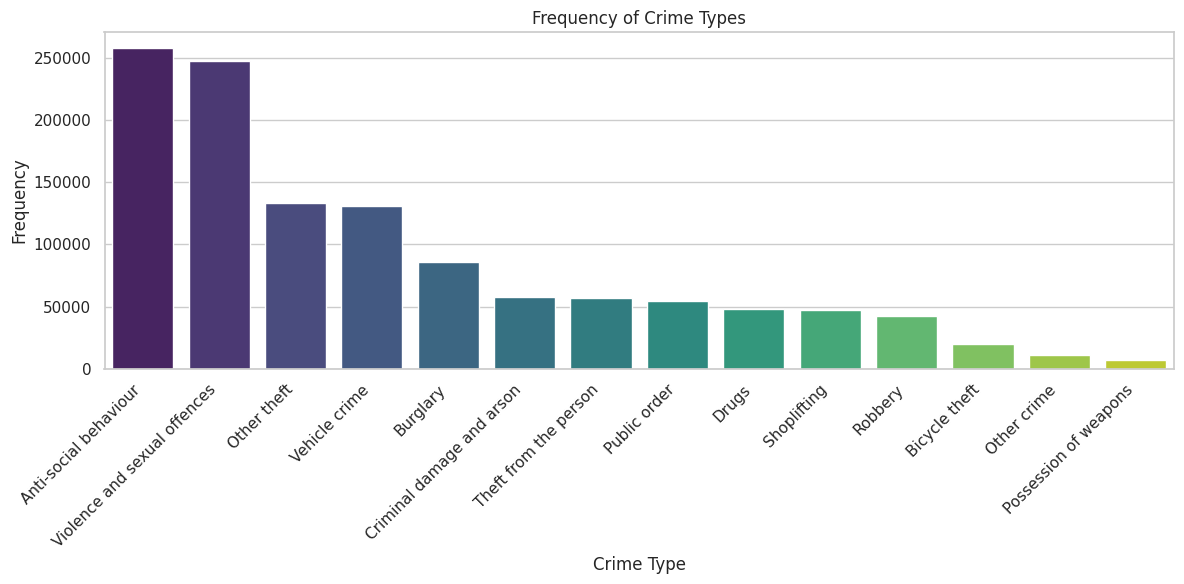

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up the plotting environment
sns.set(style="whitegrid")

# Crime type frequency visualization
plt.figure(figsize=(12, 6))
crime_type_counts = data['Crime type'].value_counts()
sns.barplot(x=crime_type_counts.index, y=crime_type_counts.values, palette="viridis")
plt.xticks(rotation=45, ha='right')
plt.title('Frequency of Crime Types')
plt.xlabel('Crime Type')
plt.ylabel('Frequency')
plt.tight_layout()

# Show the plot
plt.show()

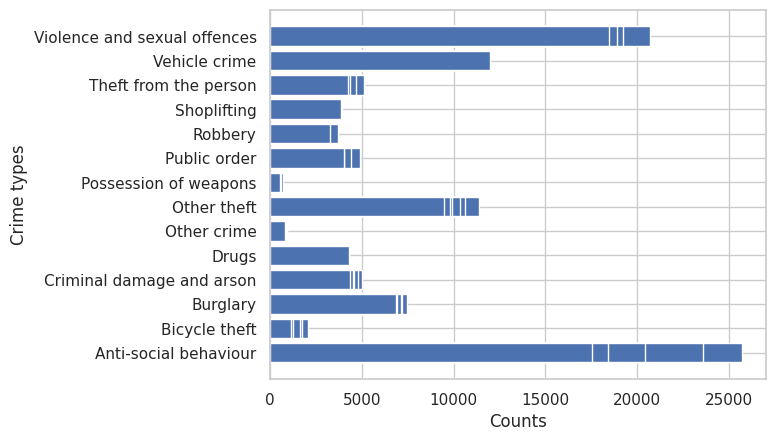

In [13]:

plt.barh(crime_counts['Crime type'],crime_counts['Count'])
plt.ylabel('Crime types')
plt.xlabel('Counts')
plt.show();

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


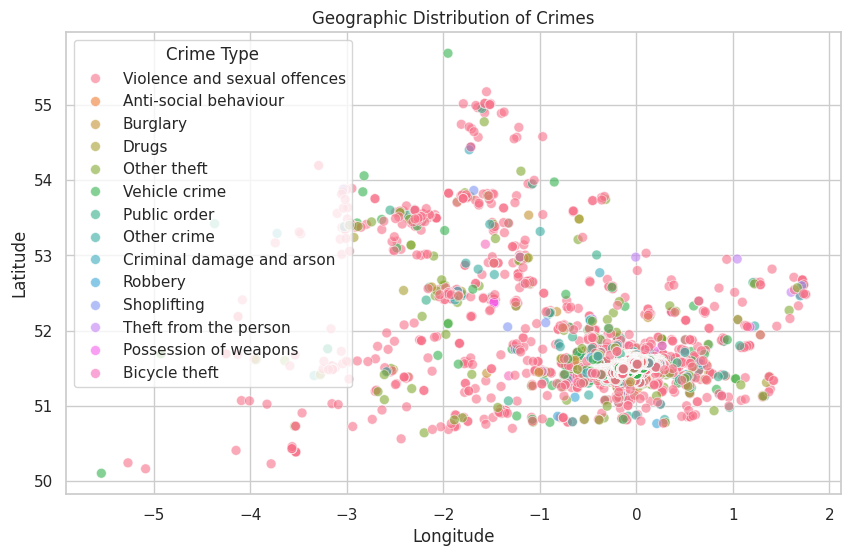

In [14]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Longitude', y='Latitude', data=data, hue='Crime type', alpha=0.6, s=50)
plt.title('Geographic Distribution of Crimes')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Crime Type')
plt.show()

In [15]:
data.isnull().sum()

Crime ID                  257399
Month                          0
Reported by                    0
Falls within                   0
Longitude                  13712
Latitude                   13712
Location                       0
LSOA code                  13712
LSOA name                  13712
Crime type                     0
Last outcome category     257399
Context                  1199021
dtype: int64

In [16]:
data['Location'].nunique()

35536

In [17]:
counts = data.groupby(['Location', 'Month', 'Crime type']).size().reset_index(name='Count')
print(counts)

                         Location    Month                 Crime type  Count
0                     No Location  2019-01      Anti-social behaviour      2
1                     No Location  2019-01              Bicycle theft     17
2                     No Location  2019-01                   Burglary     20
3                     No Location  2019-01  Criminal damage and arson     23
4                     No Location  2019-01                      Drugs     54
...                           ...      ...                        ...    ...
609172  On or near Zoffany Street  2019-12  Criminal damage and arson      1
609173  On or near Zoffany Street  2019-12               Public order      1
609174  On or near Zoffany Street  2019-12              Vehicle crime      1
609175  On or near Zoffany Street  2020-01      Anti-social behaviour      1
609176  On or near Zoffany Street  2020-01                Other theft      1

[609177 rows x 4 columns]


In [18]:
counts = data.groupby(['Month','Longitude','Latitude','Location', 'Crime type']).size().reset_index(name='Count')
print(counts)

          Month  Longitude   Latitude                           Location  \
0       2019-01  -4.253218  51.690707             On or near Cwrt Gwscwm   
1       2019-01  -3.101522  53.559364         On or near Park/Open Space   
2       2019-01  -2.995421  53.485391            On or near Bridge Croft   
3       2019-01  -2.948778  53.892805              On or near Ned'S Lane   
4       2019-01  -2.894323  53.432159             On or near Access Road   
...         ...        ...        ...                                ...   
800599  2020-01   1.284774  51.942938            On or near Maria Street   
800600  2020-01   1.422495  51.335990          On or near Newcastle Hill   
800601  2020-01   1.454798  52.058010  On or near Sports/Recreation Area   
800602  2020-01   1.668448  52.570343            On or near Farman Close   
800603  2020-01   1.733734  52.490530         On or near El Alamein Road   

                          Crime type  Count  
0       Violence and sexual offences     

In [19]:
data[['Longitude','Latitude']].nunique()

Longitude    57964
Latitude     55157
dtype: int64

In [20]:
rate = data.groupby(['Month','Location','Crime type']).size().reset_index(name='Total_Crimes')
print(rate)

          Month                   Location                 Crime type  \
0       2019-01                No Location      Anti-social behaviour   
1       2019-01                No Location              Bicycle theft   
2       2019-01                No Location                   Burglary   
3       2019-01                No Location  Criminal damage and arson   
4       2019-01                No Location                      Drugs   
...         ...                        ...                        ...   
609172  2020-01     On or near Zoar Street                   Burglary   
609173  2020-01     On or near Zoar Street                      Drugs   
609174  2020-01     On or near Zoar Street                Other theft   
609175  2020-01  On or near Zoffany Street      Anti-social behaviour   
609176  2020-01  On or near Zoffany Street                Other theft   

        Total_Crimes  
0                  2  
1                 17  
2                 20  
3                 23  
4       

In [21]:
Rate = pd.DataFrame(rate)
Rate.head(20)

,Month,Location,Crime type,Total_Crimes
0,2019-01,No Location,Anti-social behaviour,2
1,2019-01,No Location,Bicycle theft,17
2,2019-01,No Location,Burglary,20
3,2019-01,No Location,Criminal damage and arson,23
4,2019-01,No Location,Drugs,54
5,2019-01,No Location,Other crime,33
6,2019-01,No Location,Other theft,111
7,2019-01,No Location,Possession of weapons,7
8,2019-01,No Location,Public order,96
9,2019-01,No Location,Robbery,44


In [22]:
Rate['Crime rate'] = Rate['Total_Crimes']
Rate.shape

(609177, 5)

In [23]:
Rate['Month'].unique()

<PeriodArray>
['2019-01', '2019-02', '2019-03', '2019-04', '2019-05', '2019-06', '2019-07',
 '2019-08', '2019-09', '2019-10', '2019-11', '2019-12', '2020-01']
Length: 13, dtype: period[M]

In [24]:
Rate.head()

,Month,Location,Crime type,Total_Crimes,Crime rate
0,2019-01,No Location,Anti-social behaviour,2,2
1,2019-01,No Location,Bicycle theft,17,17
2,2019-01,No Location,Burglary,20,20
3,2019-01,No Location,Criminal damage and arson,23,23
4,2019-01,No Location,Drugs,54,54


In [25]:
Rate = Rate.drop(columns='Total_Crimes')
Rate.head(20)

,Month,Location,Crime type,Crime rate
0,2019-01,No Location,Anti-social behaviour,2
1,2019-01,No Location,Bicycle theft,17
2,2019-01,No Location,Burglary,20
3,2019-01,No Location,Criminal damage and arson,23
4,2019-01,No Location,Drugs,54
5,2019-01,No Location,Other crime,33
6,2019-01,No Location,Other theft,111
7,2019-01,No Location,Possession of weapons,7
8,2019-01,No Location,Public order,96
9,2019-01,No Location,Robbery,44


In [26]:
Rate.shape

(609177, 4)

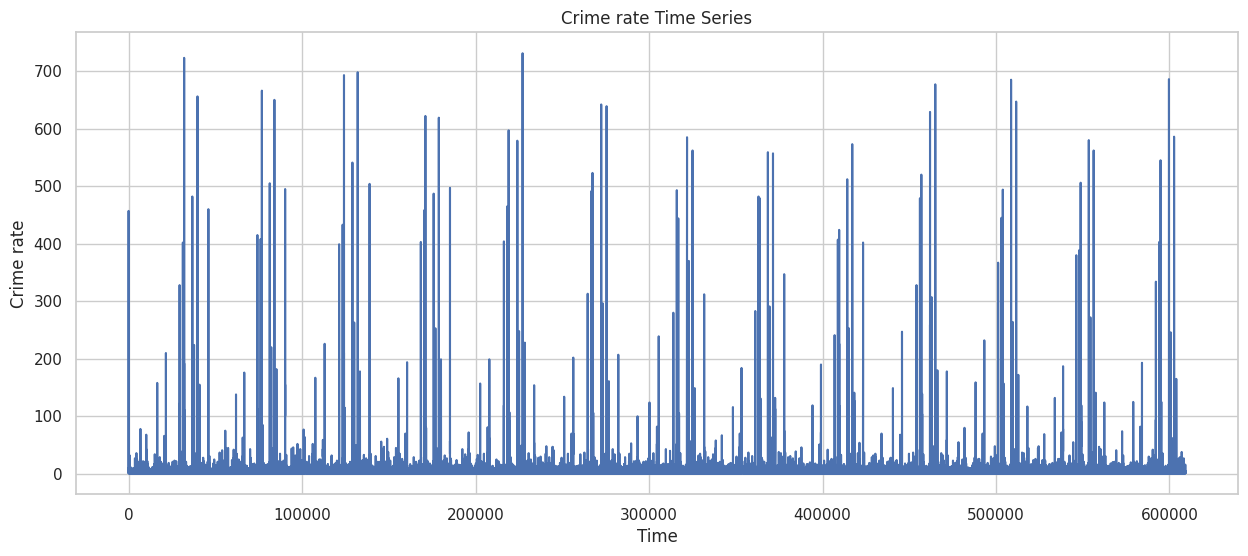

In [27]:
fig, ax = plt.subplots(figsize=(15, 6))
Rate['Crime rate'].plot(xlabel='Time',ylabel='Crime rate',title='Crime rate Time Series',ax=ax);

In [28]:
import plotly.express as px
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

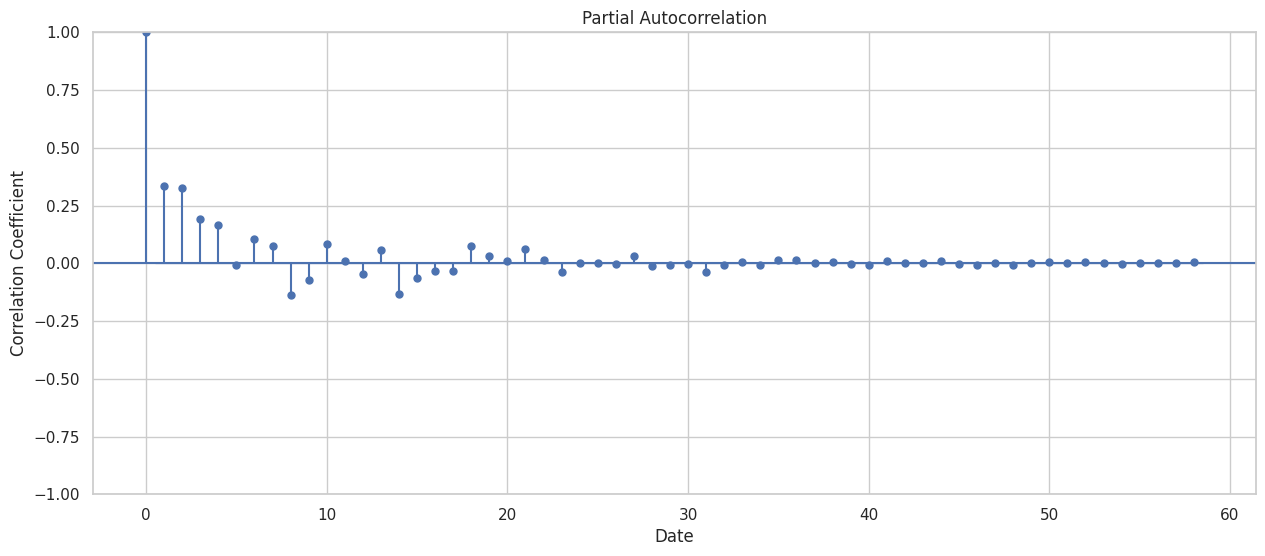

In [29]:
fig,ax=plt.subplots(figsize=(15,6))
plot_pacf(Rate['Crime rate'],ax=ax)
plt.xlabel("Date")
plt.ylabel("Correlation Coefficient");

In [30]:
X = Rate.drop(columns='Crime rate')
y = Rate['Crime rate']

In [31]:
X.head()

,Month,Location,Crime type
0,2019-01,No Location,Anti-social behaviour
1,2019-01,No Location,Bicycle theft
2,2019-01,No Location,Burglary
3,2019-01,No Location,Criminal damage and arson
4,2019-01,No Location,Drugs


In [32]:
X.isnull().sum()

Month         0
Location      0
Crime type    0
dtype: int64

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline

In [34]:
cutoff = int(len(X)*0.8)
X_train, y_train = X.iloc[:cutoff],y.iloc[:cutoff]
X_test, y_test = X.iloc[cutoff:],y.iloc[cutoff:]

In [35]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(487341, 3)
(121836, 3)
(487341,)
(121836,)


## Baseline model

In [36]:
y_mean = y_train.mean()
Baseline = [y_mean] * len(y_train)

In [37]:
mse = mean_squared_error(y_train,Baseline)
Baseline_rmse = np.sqrt(mse)
print('Root mean squared error for Baseline model:', Baseline_rmse.round())


Root mean squared error for Baseline model: 10.0


## Model building

In [38]:

model_lr = make_pipeline(OneHotEncoder(handle_unknown='ignore'),LinearRegression())
model_lr.fit(X_train,y_train)

Pipeline(steps=[('onehotencoder', OneHotEncoder(handle_unknown='ignore')),
                ('linearregression', LinearRegression())])

In [39]:
y_pred_training = model_lr.predict(X_train)
mse = mean_squared_error(y_train,y_pred_training)
training_rmse = np.sqrt(mse)
print('Root mean squared error for Training model:', training_rmse.round())

Root mean squared error for Training model: 7.0


In [40]:
y_pred_testing = model_lr.predict(X_test)
mse = mean_squared_error(y_test,y_pred_testing)
testing_rmse = np.sqrt(mse)
print('Root mean squared error for Testing model:', testing_rmse.round())

Root mean squared error for Testing model: 7.0


In [41]:
df_pred_test = pd.DataFrame(
        {
            'y_test':y_test,
            'y_pred_testing':model_lr.predict(X_test)
        }
            )
df_pred_test.head(10)


,y_test,y_pred_testing
487341,1,-0.138961
487342,1,0.672412
487343,1,1.854293
487344,2,-2.295336
487345,1,1.875913
487346,1,0.793058
487347,1,0.381463
487348,1,1.494604
487349,1,1.789555
487350,1,0.621975


In [42]:
def make_prediction(Month,Location, Crime_type):
    data = {    'Month' : Month,
                'Location' : Location,
                'Crime type' : Crime_type
            }
    df = pd.DataFrame(data,index=[0])
    prediction = model_lr.predict(df).round(2)[0]
    return f"Predicted crime rate: {prediction}"

In [43]:
make_prediction("2022-08",'On or near A1','Bicycle theft')

'Predicted crime rate: 0.2'

In [ ]:
Location = input('Enter Location: ')
Month = input('Enter Month: ' )
Crime_type = input('Enter Crime type: ')
make_prediction(Month,Location, Crime_type)